## Classification on ALL RUNS for ALL SUBJECTS 
Shateesh Bhugwansing  

This notebook does Naive Bayes classification on all runs of all subjects.  

NOTE: I am reading the data from an external hard drive. This notebook will change when we find a way to store the data on the cloud

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import os.path as op
from os import listdir

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams.update({'font.size': 12})


#import mne to read EEG data 
import mne 
from mne.decoding import Vectorizer

### Store all filenames in a list 
using os module (a python thing)

In [4]:
data_dir = "/Volumes/SB/all_eeg_data/eeg_data"
all_runs = [f for f in listdir(data_dir) if op.isfile(op.join(data_dir, f))]

# remove corrupt files 
all_runs.remove('Ex10_Suj26_Run2-epo.fif')
all_runs.remove('Ex10_Suj26_Run4-epo.fif')

# remove files where number of new + scrambled epochs < 10
all_runs.remove('Ex10_Suj19_Run1-epo.fif')
all_runs.remove('Ex10_Suj21_Run1-epo.fif')
all_runs.remove('Ex10_Suj26_Run1-epo.fif')
all_runs.remove('Ex10_Suj26_Run3-epo.fif')

### Run classification on all files, in a loop

In [33]:
scores = []
scores_and_files = {}
for i in all_runs:
    epo = mne.epochs.read_epochs(op.join(data_dir, i), preload=True);
    
    # extract just events 4 & 5 from epochs object
    epo = epo[(epo.events[:,-1] == 4) | (epo.events[:,-1] == 5)]
    
    # get data and targets from epo list, use for classification
    data = epo.get_data()
    labels = epo.events[:,-1]
    
    # prep classifier, prediction array, CV
    clf = make_pipeline(Vectorizer(),
                       StandardScaler(), 
                       GaussianNB())
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    preds = np.empty(len(labels))
    
    #perform classification
    for train, test in cv.split(data, labels):
        clf.fit(data[train], labels[train])
        preds[test] = clf.predict(data[test])
        
    
    #save accuracy 
    scores_and_files[i] = metrics.accuracy_score(labels, preds) 
    
print("loop is done. \n", len(scores))

Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run

    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj14_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj15_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 .

287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj19_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
173 matching events found
Created an SSP operator (subspace dimension = 1)
173 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj19_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
207 matching events found
Created an SSP operator (subspace dimension = 1)
207 matching events found
Created an SSP operator (subsp

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj23_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
305 matching events found
Created an SSP operator (subspace dimension = 1)
305 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj23_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items

        0 CTF compensation matrices available
264 matching events found
Created an SSP operator (subspace dimension = 1)
264 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj28_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
238 matching events found
Created an SSP operator (subspace dimension = 1)
238 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj28_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
241 matchi

1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj6_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj6_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
191 matching events found
Created an SSP operator (subspace dimension = 1)
191 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_d

##  Results

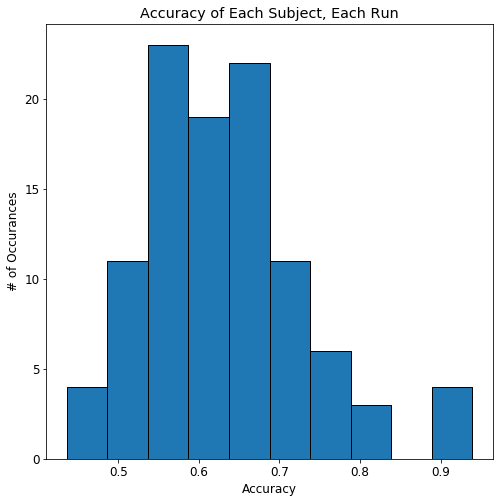

In [45]:
plt.title('Accuracy of Each Subject, Each Run')
plt.xlabel('Accuracy')
plt.ylabel('# of Occurances')
plt.rcParams["patch.force_edgecolor"] = True
plt.hist(scores_and_files.values(), bins=10);

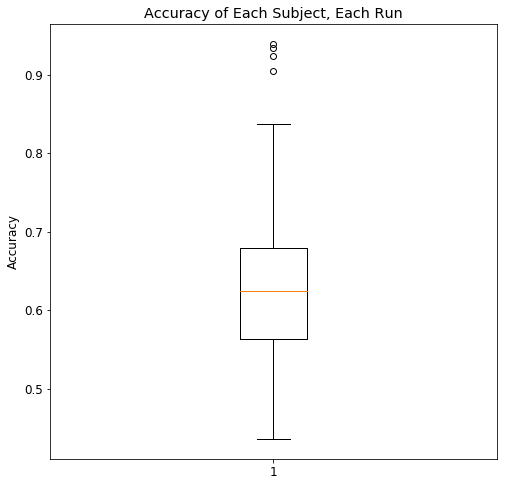

In [38]:
plt.title('Accuracy of Each Subject, Each Run')
plt.ylabel('Accuracy')
plt.boxplot(scores_and_files.values());

In [43]:
print "Mean of all scores is: ", np.mean(scores_and_files.values())


Mean of all scores is:  0.6318614529205133


# Attempt 2

Same thing, but splitting the epochs in half in order to have more "runs"  

In [10]:
scores_and_files_new = {}
for j in all_runs:
    epo = mne.epochs.read_epochs(op.join(data_dir, j), preload=True);
    
    # extract just events 4 & 5 from epochs object
    epo = epo[(epo.events[:,-1] == 4) | (epo.events[:,-1] == 5)]
    
    # get data and targets from epo list, use for classification
    data = epo.get_data()
    labels = epo.events[:,-1]
    
    ## SPLIT THE EPOCHS IN HALF
    labels_new = labels
    labels_new = np.concatenate((labels_new, labels_new))
    
    data_1 = data[:,:,0:700]
    data_2 = data[:,:, 700:1400]
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    data_new = np.concatenate((data_1, data_2))
    
    # prep classifier, prediction array, CV
    clf = make_pipeline(Vectorizer(),
                       StandardScaler(), 
                       GaussianNB())
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    preds_new = np.empty(len(labels_new))
    
    #perform classification
    for train, test in cv.split(data_new, labels_new):
        clf.fit(data_new[train], labels_new[train])
        preds_new[test] = clf.predict(data_new[test])
        
    
    #save accuracy 
    scores_and_files_new[j] = metrics.accuracy_score(labels_new, preds_new) 
    
print("loop is done. \n", len(scores_and_files_new.values()))

Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run

    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj14_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj15_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 .

287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj19_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
173 matching events found
Created an SSP operator (subspace dimension = 1)
173 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj19_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
207 matching events found
Created an SSP operator (subspace dimension = 1)
207 matching events found
Created an SSP operator (subsp

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj23_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
305 matching events found
Created an SSP operator (subspace dimension = 1)
305 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj23_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items

        0 CTF compensation matrices available
264 matching events found
Created an SSP operator (subspace dimension = 1)
264 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj28_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
238 matching events found
Created an SSP operator (subspace dimension = 1)
238 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj28_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
241 matchi

1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj6_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj6_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
191 matching events found
Created an SSP operator (subspace dimension = 1)
191 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_d

/Users/shateeshbhugwansing/anaconda/envs/EEG/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj6_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
177 matching events found
Created an SSP operator (subspace dimension = 1)
177 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj7_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj7_Run2-e

NameError: name 'scores' is not defined

In [11]:
len(scores_and_files_new.values())

103

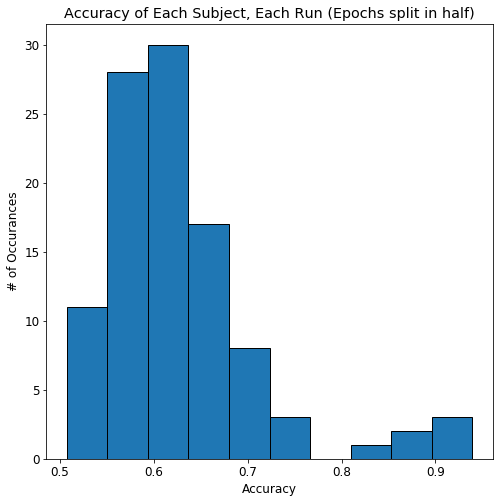

In [14]:
plt.title('Accuracy of Each Subject, Each Run (Epochs split in half)')
plt.xlabel('Accuracy')
plt.ylabel('# of Occurances')
plt.rcParams["patch.force_edgecolor"] = True
plt.hist(scores_and_files_new.values(), bins=10);

In [15]:
print "Mean of all scores (epochs split in half) is: ", np.mean(scores_and_files_new.values())


Mean of all scores (epochs split in half) is:  0.6284578486673603


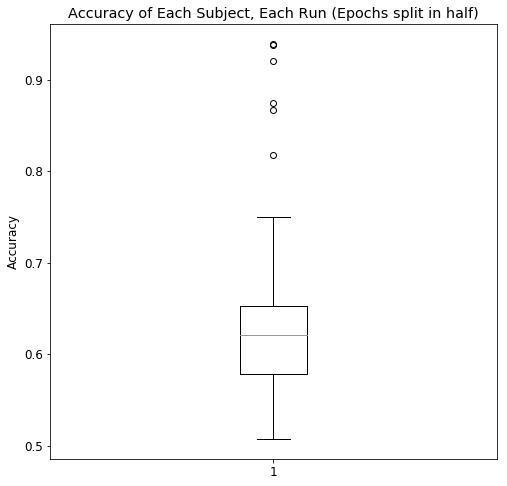

In [16]:
plt.title('Accuracy of Each Subject, Each Run (Epochs split in half)')
plt.ylabel('Accuracy')
plt.boxplot(scores_and_files_new.values());

# Attempt 3

extract epoch data from times 400-1000ms, the time range in which the ROC score was highest (according to Emmanuil)   

In [17]:
scores_and_files_range = {}
for j in all_runs:
    epo = mne.epochs.read_epochs(op.join(data_dir, j), preload=True);
    
    # extract just events 4 & 5 from epochs object
    epo = epo[(epo.events[:,-1] == 4) | (epo.events[:,-1] == 5)]
    
    # get data and targets from epo list, use for classification
    data = epo.get_data()
    labels = epo.events[:,-1]
    
    # Change the time range for each epoch
    data_range = data[:,:,400:1000]
    
    # prep classifier, prediction array, CV
    clf = make_pipeline(Vectorizer(),
                       StandardScaler(), 
                       GaussianNB())
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    preds = np.empty(len(labels))
    
    #perform classification
    for train, test in cv.split(data_range, labels):
        clf.fit(data_range[train], labels[train])
        preds[test] = clf.predict(data_range[test])
        
    
    #save accuracy 
    scores_and_files_range[j] = metrics.accuracy_score(labels, preds) 
    
print("loop is done. \n", len(scores_and_files_range.values()))

Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj10_Run

/Users/shateeshbhugwansing/anaconda/envs/EEG/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj11_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
157 matching events found
Created an SSP operator (subspace dimension = 1)
157 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


/Users/shateeshbhugwansing/anaconda/envs/EEG/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj11_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
197 matching events found
Created an SSP operator (subspace dimension = 1)
197 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj12_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
165 matching events found
Created an SSP operator (subspace dimension = 1)
165 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj12_Run

    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
288 matching events found
Created an SSP operator (subspace dimension = 1)
288 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj16_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj16_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 .

287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj1_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
293 matching events found
Created an SSP operator (subspace dimension = 1)
293 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj20_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspa

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
259 matching events found
Created an SSP operator (subspace dimension = 1)
259 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj24_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
263 matching events found
Created an SSP operator (subspace dimension = 1)
263 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj25_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items

/Users/shateeshbhugwansing/anaconda/envs/EEG/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj25_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
177 matching events found
Created an SSP operator (subspace dimension = 1)
177 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj25_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
149 matching events found
Created an SSP operator (subspace dimension = 1)
149 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj27_Run

        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
202 matching events found
Created an SSP operator (subspace dimension = 1)
202 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj4_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj4_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF com

/Users/shateeshbhugwansing/anaconda/envs/EEG/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj6_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
177 matching events found
Created an SSP operator (subspace dimension = 1)
177 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj7_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Volumes/SB/all_eeg_data/eeg_data/Ex10_Suj7_Run2-e

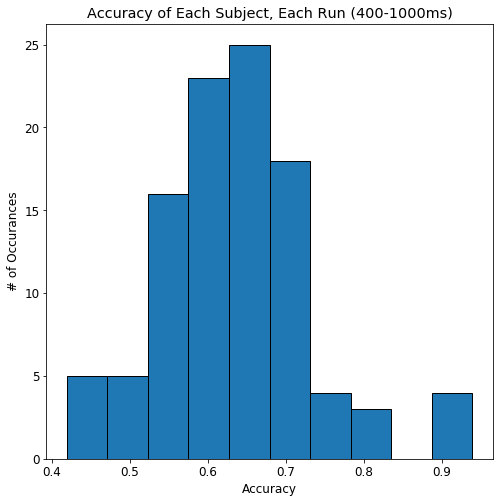

In [18]:
plt.title('Accuracy of Each Subject, Each Run (400-1000ms)')
plt.xlabel('Accuracy')
plt.ylabel('# of Occurances')
plt.rcParams["patch.force_edgecolor"] = True
plt.hist(scores_and_files_range.values(), bins=10);

In [19]:
print "Mean of all scores (400-1000ms) is: ", np.mean(scores_and_files_range.values())


Mean of all scores (400-1000ms) is:  0.6366383951479174


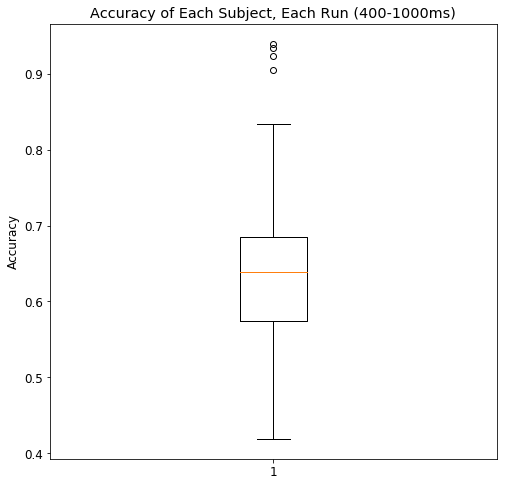

In [20]:
plt.title('Accuracy of Each Subject, Each Run (400-1000ms)')
plt.ylabel('Accuracy')
plt.boxplot(scores_and_files_range.values());